# Assignment 3 Team 9 
## LAURA KAY AND AUSTIN NGUYEN 

## Classification model on our own dataset

### Decision Tree 

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./data/auto-mpg.csv')

# Select features and target variable
X = data[['displacement']]
y = data['weight']

X = data[['displacement']].values 
y = data['weight'].values



In [115]:
dataset = data.values

X = dataset[:, 2:3] 
y = dataset[:, 4]  

In [116]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [117]:
y_pred = regressor.predict([[3750]])
print("Predicted weight: % d\n"% y_pred)

Predicted weight:  4154



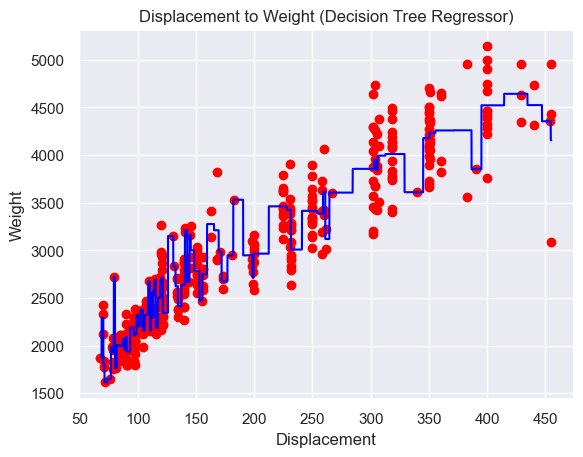

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


# Plot the regression line
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Displacement to Weight (Decision Tree Regressor)')
plt.xlabel('Displacement')
plt.ylabel('Weight')
plt.show()


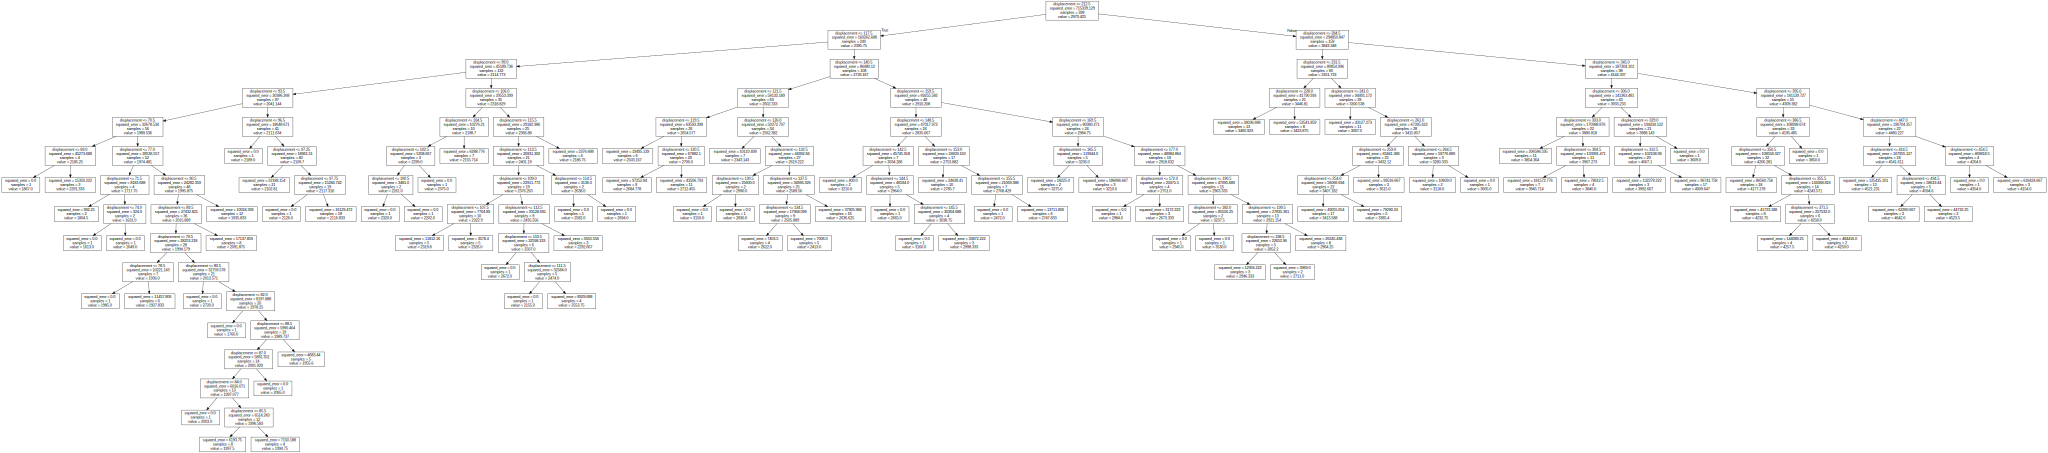

In [119]:
from sklearn import tree
import graphviz  

regressor.fit(X, y)
dot_data = tree.export_graphviz(regressor, out_file =None,feature_names =['displacement'])  

graph = graphviz.Source(dot_data)  
graph

## Decision Tree Classifier 

In [120]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [121]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [122]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('data/auto-mpg.csv',header='infer')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [123]:
# ranges and corresponding labels
weight_ranges = [(0,3000), (3001, 5500)]  
labels = ['medium weight', 'heavy weight']

# Replace values 'weight' column 
for i, (lower, upper) in enumerate(weight_ranges):
    data['weight'] = data['weight'].replace(range(lower, upper + 1), labels[i])

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,heavy weight,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,heavy weight,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,heavy weight,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,heavy weight,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,heavy weight,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,medium weight,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,medium weight,24.6,82,2,vw pickup
395,32.0,4,135.0,84,medium weight,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,medium weight,18.6,82,1,ford ranger


/Users/laurakay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


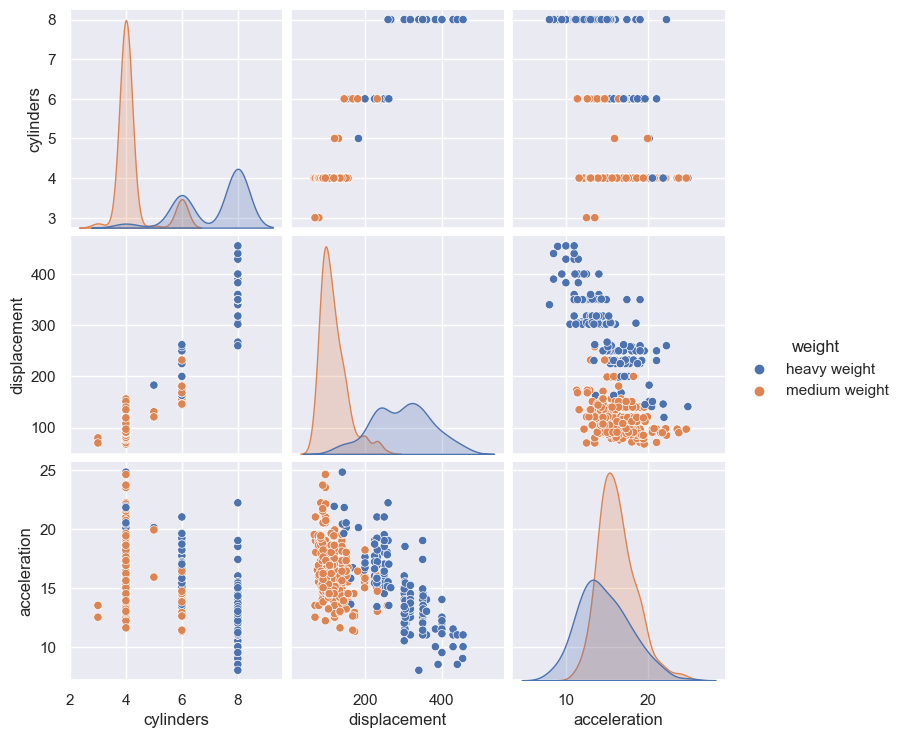

In [124]:
# Paired plot using seaborn
sns.set()
sns.pairplot(data[['cylinders', 'displacement', 'horsepower', 'acceleration','weight']],
             hue='weight', diag_kind="kde")

In [125]:
pd.crosstab([data['cylinders'],data['displacement']],data['weight'])

weight                  heavy weight  medium weight
cylinders displacement                             
3         70.0                     0              3
          80.0                     0              1
4         68.0                     0              1
          71.0                     0              2
          72.0                     0              1
...                              ...            ...
8         400.0                   13              0
          429.0                    3              0
          440.0                    2              0
          454.0                    1              0
          455.0                    3              0

[86 rows x 2 columns]

## Decision Tree Classifier 

In [126]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data_numeric = data.drop(['name'], axis=1).replace('?', np.nan).dropna()

label_encoder = LabelEncoder()
data_numeric['weight'] = label_encoder.fit_transform(data_numeric['weight'])

# Split feature  and target
Y = data_numeric['weight']
X = data_numeric.drop(['weight'], axis=1)

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [127]:
X

,mpg,cylinders,displacement,horsepower,acceleration,year,origin
0,18.0,8,307.0,130,12.0,70,1
1,15.0,8,350.0,165,11.5,70,1
2,18.0,8,318.0,150,11.0,70,1
3,16.0,8,304.0,150,12.0,70,1
4,17.0,8,302.0,140,10.5,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,15.6,82,1
394,44.0,4,97.0,52,24.6,82,2
395,32.0,4,135.0,84,11.6,82,1
396,28.0,4,120.0,79,18.6,82,1


In [128]:
import graphviz


dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)  

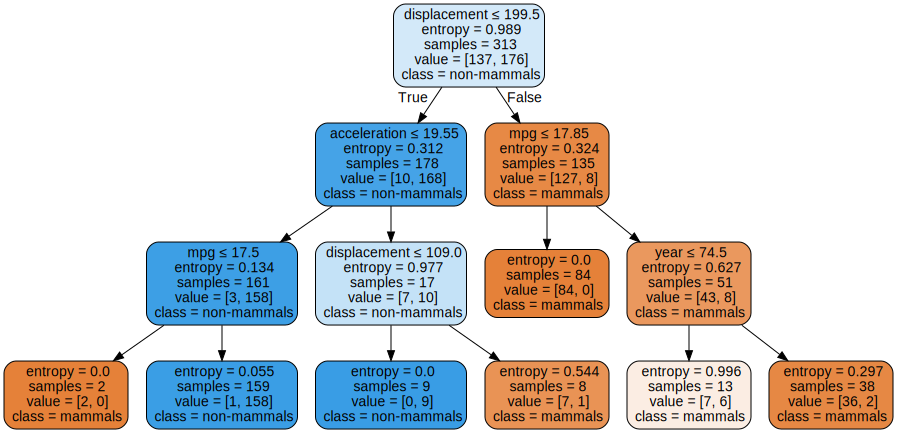

In [129]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['mammals','non-mammals'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [130]:
import pandas as pd

# Define the test data as a list of lists
testData = [
    [20.0, 6, 200.0, 100, 'heavy weight', 13.0, 70, 1, 'test car 1'],
    [22.0, 6, 225.0, 110, 'medium weight', 12.5, 71, 1, 'test car 2'],
    [25.0, 4, 150.0, 90, 'heavy weight', 14.0, 72, 1, 'test car 3'],
   
]

columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

# Create a DataFrame using the test data and columns from the original data
testData = pd.DataFrame(testData, columns = columns )
testData




,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,20.0,6,200.0,100,heavy weight,13.0,70,1,test car 1
1,22.0,6,225.0,110,medium weight,12.5,71,1,test car 2
2,25.0,4,150.0,90,heavy weight,14.0,72,1,test car 3


In [131]:
testY = pd.DataFrame(testData, columns=['weight'])
testX = testData.drop(['name','weight'],axis=1)

testY_numerical = testY['weight'].map({'medium weight': 0, 'heavy weight': 1})
testY_numerical.fillna(testY_numerical.mean(), inplace=True)
testY_numerical.fillna(0.0, inplace=True) 




predY = clf.predict(testX)
predicted_weight = pd.Series(predY).map({0: 'medium weight', 1: 'heavy weight'})
predictions = pd.concat([testData['displacement'], predicted_weight.rename('Predicted Weight')], axis=1)
predictions




,displacement,Predicted Weight
0,200.0,medium weight
1,225.0,medium weight
2,150.0,heavy weight


[[1 0]
 [1 1]]
Accuracy on test data is 0.67
F1 score on test data is 0.67
Precision Score on test data is 1.00
Recall score on test data is 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



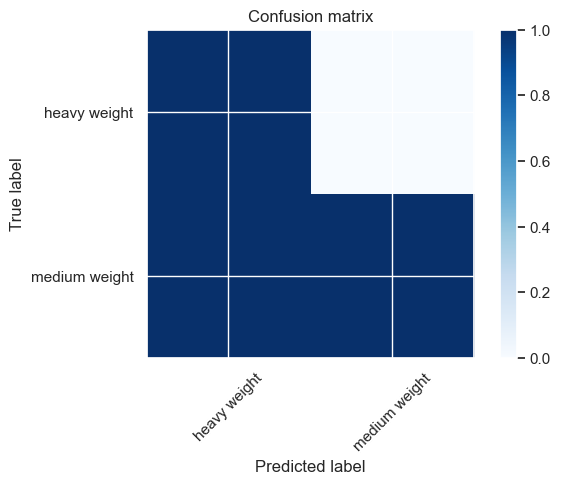

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

confusion = confusion_matrix(testY_numerical, predY)
print(confusion)

plot_confusion_matrix(confusion, data.weight.unique(), title='Confusion matrix', cmap=plt.cm.Blues)

print('Accuracy on test data is %.2f' % (accuracy_score(testY_numerical, predY)))
print('F1 score on test data is %.2f' % (f1_score(testY_numerical, predY,pos_label=1.0)))
print('Precision Score on test data is %.2f' % (precision_score(testY_numerical, predY,pos_label=1.0)))
print('Recall score on test data is %.2f' % (recall_score(testY_numerical, predY,pos_label=1.0)))
print( classification_report(testY_numerical,predY))



In [133]:
list(data.weight.unique())

['heavy weight', 'medium weight']

## Logistic Regression 

/Users/laurakay/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurakay/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/laurakay/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMI

[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 0 1]
[1 0 1]
[1 1 1]


/Users/laurakay/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Accuracy')

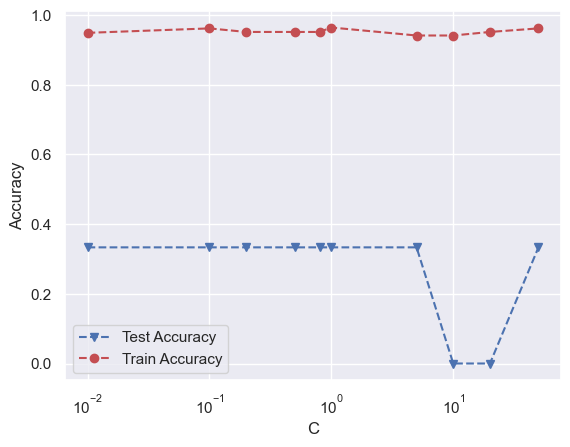

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
testY_encoded = label_encoder.fit_transform(testY)


C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X,Y.values.ravel())
    log_reg_pred = clf.predict(testX)
    log_reg_pred_train = clf.predict(X)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(testY_encoded, log_reg_pred))
    LRtrainAcc.append(accuracy_score(Y,log_reg_pred_train))
    
    

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

## Naive Bayes Classifier

In [135]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,Y.values.ravel())
NB_pred = clf_NB.predict(testX)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(testY_numerical, NB_pred)))

[0 0 1]
Accuracy on test data is 0.67


## Support Vector Machine Classifier 

### Linear Decision Boundary 

[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]


Text(0, 0.5, 'Accuracy')

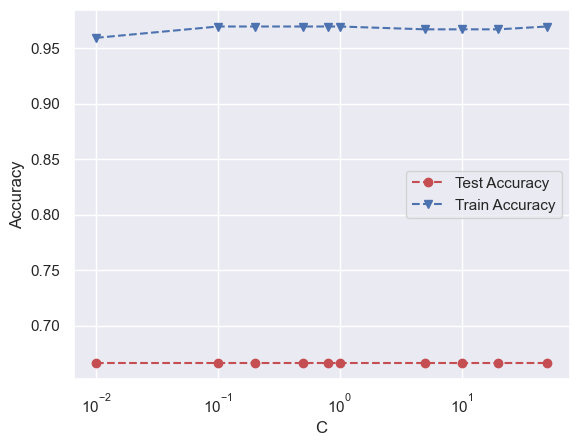

In [136]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(X,Y.values.ravel())
    svml_pred = clf.predict(testX)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(testY_numerical, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [137]:
print('Accuracy: %.2f' % (accuracy_score(testY_numerical, svml_pred))) 

Accuracy: 0.67


### Non Linear Decision Boundary

[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]


Text(0, 0.5, 'Accuracy')

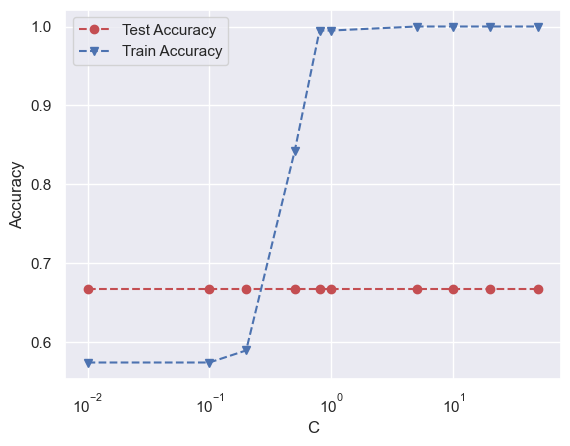

In [138]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
 

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X,Y.values.ravel())
    svml_pred = clf.predict(testX)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(testY_numerical, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [140]:
accuracy = accuracy_score(testY_numerical,svml_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


## K Nearest Neighbor (KNN) Classifier 

[1 0 1]
[1 0 1]
[1 0 1]
Accuracy: 1.0


Text(0, 0.5, 'Accuracy')

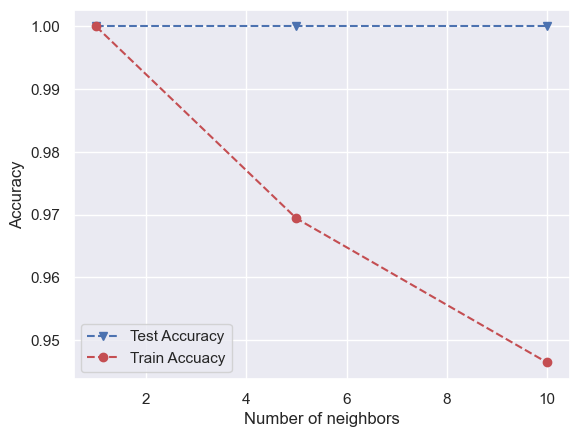

In [141]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X.values, Y.values.ravel())
    knn_pred = clf.predict(testX.values)
    knn_pred_train = clf.predict(X.values)
    print(knn_pred)
    testAcc.append(accuracy_score(testY_numerical, knn_pred))
    trainAcc.append(accuracy_score(Y,knn_pred_train))
    
accuracy = accuracy_score(testY_numerical, knn_pred)
print("Accuracy:", accuracy)

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

# Part 2 : Feature Selection and Data Splitting

In [142]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Load the data
data = pd.read_csv('./data/Churn_Modelling.csv')

# get rid of customerId, rowNumber, and surname 
data = data.drop(columns=['CustomerId', 'RowNumber', 'Surname'])

#feature and target variable 
X = data.drop(columns=['Exited'])
y = data['Exited']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# feature selection
selector = SelectKBest(score_func=f_classif, k=9) 
X_selected = selector.fit_transform(X_preprocessed, y)

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# predictions on testing data
y_pred = clf.predict(X_test)


print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_pred)))
print('F1 score on test data is %.2f' % (f1_score(y_test, y_pred,pos_label=1)))
print('Precision Score on test data is %.2f' % (precision_score(y_test, y_pred,pos_label=1)))
print('Recall score on test data is %.2f' % (recall_score(y_test, y_pred,pos_label=1)))
print( classification_report(y_test,y_pred))



Accuracy on test data is 0.82
F1 score on test data is 0.52
Precision Score on test data is 0.54
Recall score on test data is 0.49
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1607
           1       0.54      0.49      0.52       393

    accuracy                           0.82      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.81      0.82      0.81      2000



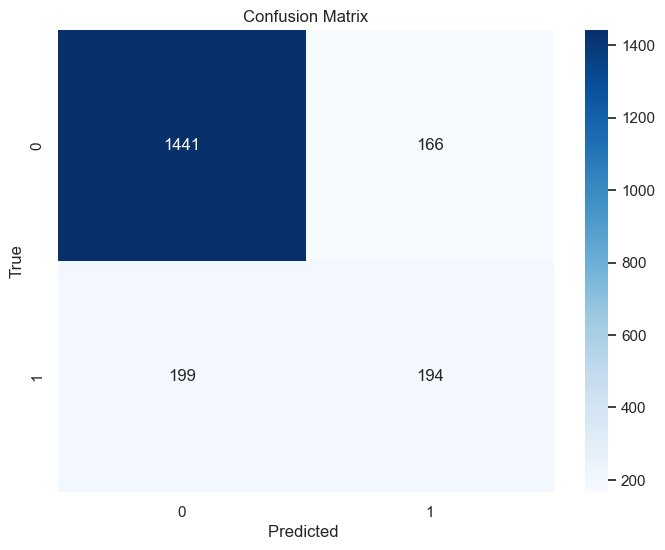

In [143]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted ")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Part 3 : Classification Model on provided dataset and Accuracy Analysis

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz


# Load the data
data = pd.read_csv('./data/Churn_Modelling.csv')

data.drop(columns=['Surname'], inplace=True)

# make geography and gender to numerical values after hot-encode
data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'])

# Get the target and feature variables 
X = data_encoded.drop(columns=['Exited'])  
y = data_encoded['Exited']

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train classifier on training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)


## Decision Tree 

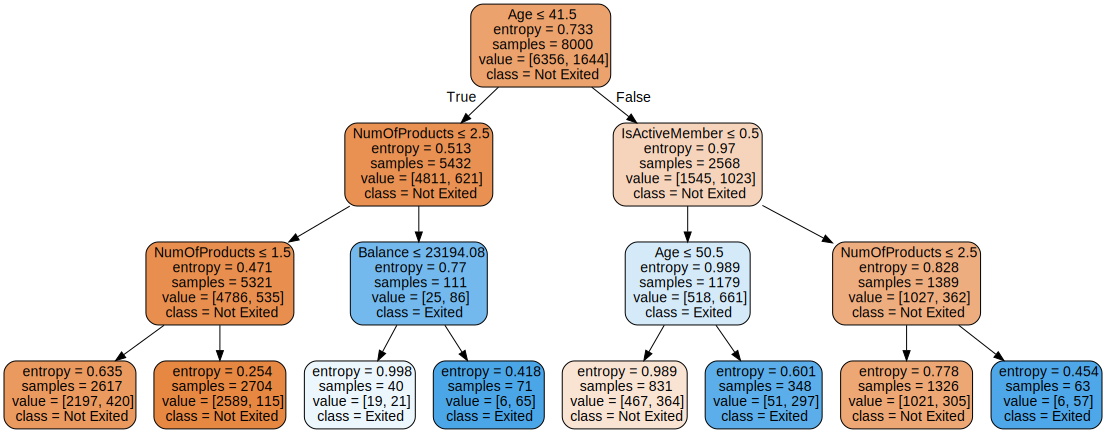

In [145]:
# Generate visualization of the decision tree
dot_data = export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['Not Exited', 'Exited'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph



In [146]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.839


## Naive Bayes Classifier

In [147]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
NB_pred = clf_NB.predict(X_test)


print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))


Accuracy on test data is 0.79


## K Nearest Neighbor(KNN) Classifier

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Accuracy: 0.799


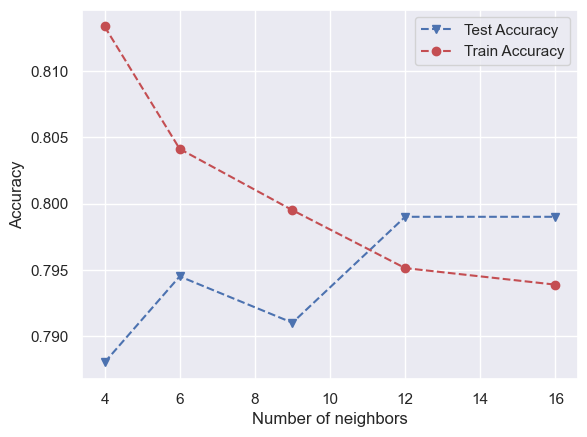

In [148]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

numNeighbors =  [4, 6, 9, 12, 16]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    knn_pred = clf.predict(X_test)
    knn_pred_train = clf.predict(X_train)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y_train, knn_pred_train))
    
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy)

plt.plot(numNeighbors, testAcc, 'bv--', numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


## Logistic Regression 

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Accuracy: 0.8035


Text(0, 0.5, 'Accuracy')

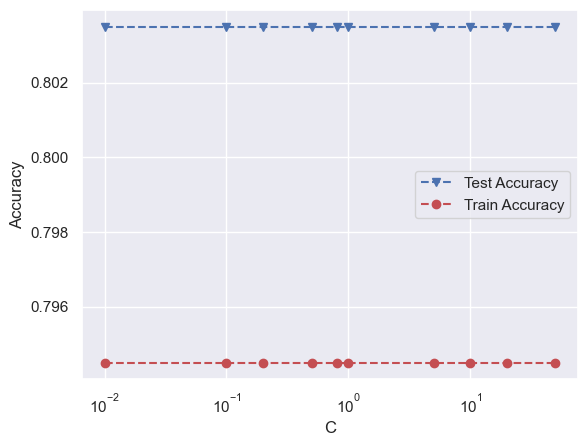

In [149]:
from sklearn.linear_model import LogisticRegression



C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X_train, y_train)
    log_reg_pred = clf.predict(X_test)
    log_reg_pred_train = clf.predict(X_train)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y_train,log_reg_pred_train))


accuracy = accuracy_score(y_test, log_reg_pred)
print("Accuracy:", accuracy)  

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

## Support Vector Machine(SVM) Classifier (Linear)

In [150]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.svm import SVC

# getting the dataset
path = "."
filename = os.path.join(path, "data/churn_modelling.csv")
fullData = pd.read_csv(filename, na_values=['NA', '?'])
fullData = fullData.drop(['Geography', 'Gender'], axis=1)

subsetData = fullData[0:999] 
X = fullData.drop(['Surname', 'Exited'], axis=1)
Y = fullData[['Exited']] 

testY = subsetData[['Exited']]  
testX = subsetData.drop(['Surname', 'Exited'], axis=1)

C = [0.1, 0.5, 0.8, 1, 5]

SVMLtestAcc = []
SVMLtrainAcc = []


for param in C:
   
    clf = SVC(C=param, kernel='linear')
    clf.fit(X, Y.values.ravel()) 
    svml_pred = clf.predict(testX)
    svml_pred_train = clf.predict(X)
    SVMLtestAcc.append(accuracy_score(testY, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y, svml_pred_train))


Text(0, 0.5, 'Accuracy')

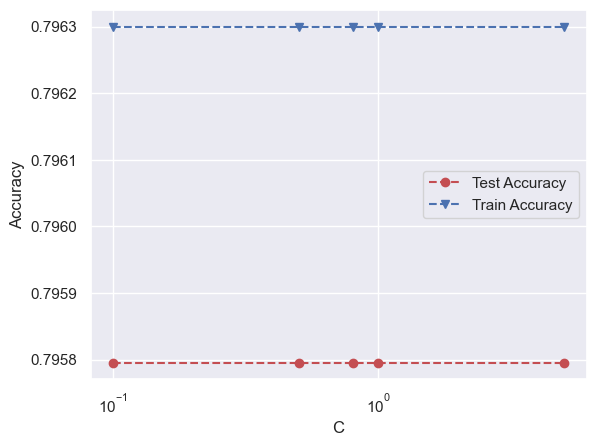

In [151]:
plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  


In [152]:
print('Accuracy: %.2f' % (accuracy_score(testY, svml_pred))) 

Accuracy: 0.80


# Accuracy Analysis

In [153]:
import pandas as pd

# Data
data = {
    "ML Model": ["Naive Bayes", "KNN", "SVM", "DT", "Logit"],
    "Accuracy on Test Set (Provide accuracy in %)": [79, 80, 80, 83, 80]
}


df = pd.DataFrame(data)

# Displaying the table
print(df)


      ML Model  Accuracy on Test Set (Provide accuracy in %)
0  Naive Bayes                                            79
1          KNN                                            80
2          SVM                                            80
3           DT                                            83
4        Logit                                            80
